In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aif360.algorithms.preprocessing.reweighing import Reweighing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1

Selected 2020 Census Data from Kaggle. This data is collected by 'University of Texas' students in 2020.
Link: https://www.kaggle.com/datasets/takumafujiwara/2020-census-data

In [466]:
#Dataset Name: Census Income DataSet
# Protected Classes: Age, Sex, Color, National Origin
df = pd.read_csv("census_2020-v33.csv")
print(df.head())

   age  workclass  fnlwgt  education  educational-num      marital-status  \
0   63  State-gov  166860    HS-grad                9  Married-civ-spouse   
1   64  Local-gov  111745    HS-grad                9  Married-civ-spouse   
2   54    Private  151825    HS-grad                9            Divorced   
3   37    Private  174690    HS-grad                9       Never-married   
4   35    Private  197229  Assoc-voc               11  Married-civ-spouse   

         occupation   relationship   race  gender  hours-per-week  \
0   Exec-managerial           Wife  White  Female              40   
1  Transport-moving        Husband  White    Male              40   
2      Adm-clerical  Not-in-family  White  Female              44   
3     Other-service      Own-child  White    Male              21   
4    Prof-specialty           Wife  White  Female              40   

  native-country  coded-income  tax-bracket income-90k-threshold  
0  United-States            22            3            

In [4]:
print("Total no of observations: ", df.shape[0])
print("Total no of variables: ", df.shape[1])

Total no of observations:  36252
Total no of variables:  15


In [5]:
print("Variables in protected classes are: age, race, sex, National Origin")
#Age: (Age Discrimination in Employment Act of 1967) (over 40)
#Race: Civil Rights Act of 1964, 1991)
#Sex: Equal Pay Act of 1963; Civil Rights Act of 1964, 1991
#National Origin: Civil Rights Act of 1964, 1991)

Variables in protected classes are: age, race, sex, National Origin


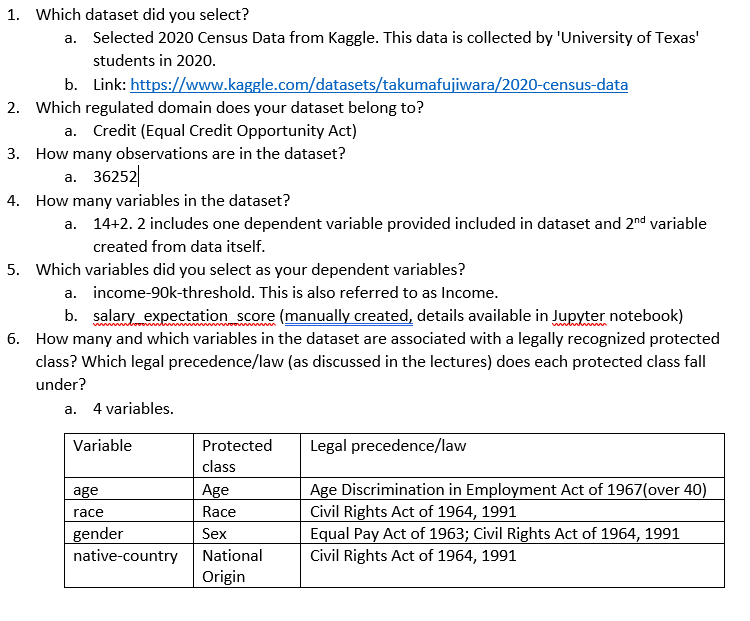

# Step 2

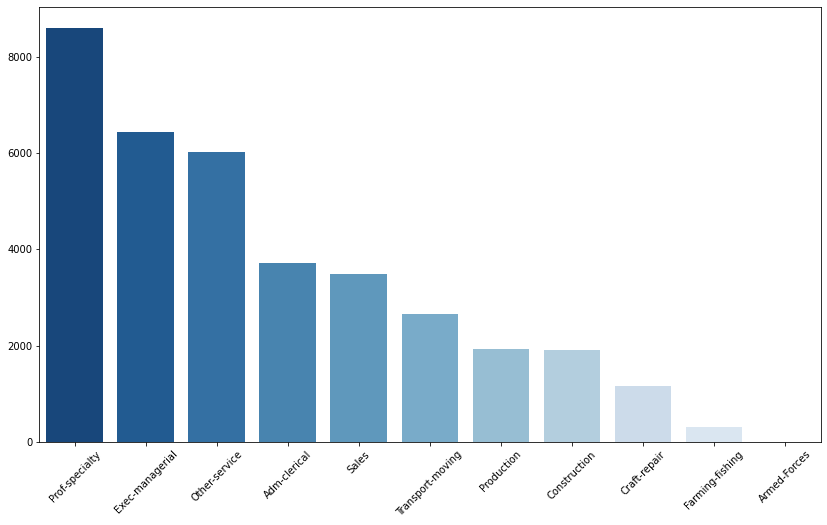

In [6]:
occupation = df['occupation'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x =occupation.index , y =occupation.values ,palette="Blues_r" )
plt.xticks(rotation = 45)
plt.show()

Introduced a new column salary_expectation_score based on occupation, education and hours spent per week on work

In [7]:
classification = {
     'Prof-specialty': 11,
     'Exec-managerial': 10,
     'Other-service':9,
     'Adm-clerical': 8,
     'Sales': 7,
     'Transport-moving':6,
     'Production': 5,
     'Construction' :4,
     'Craft-repair':3,
     'Farming-fishing':2,
     'Armed-Forces' :1
}
df['occupation_num'] = df['occupation'].map(classification)


In [8]:
df['salary_expectation_score'] = df['occupation_num'] + (df['educational-num'] * df['hours-per-week'])
print(df)

       age  workclass  fnlwgt  education  educational-num      marital-status  \
0       63  State-gov  166860    HS-grad                9  Married-civ-spouse   
1       64  Local-gov  111745    HS-grad                9  Married-civ-spouse   
2       54    Private  151825    HS-grad                9            Divorced   
3       37    Private  174690    HS-grad                9       Never-married   
4       35    Private  197229  Assoc-voc               11  Married-civ-spouse   
...    ...        ...     ...        ...              ...                 ...   
36247   41    Private  180857    HS-grad                9  Married-civ-spouse   
36248   58    Private  117245    HS-grad                9  Married-civ-spouse   
36249   31    Private  126498    HS-grad                9       Never-married   
36250   57    Private   72015  Bachelors               13            Divorced   
36251   32    Private   94815    HS-grad                9       Never-married   

             occupation    

Q2.1)
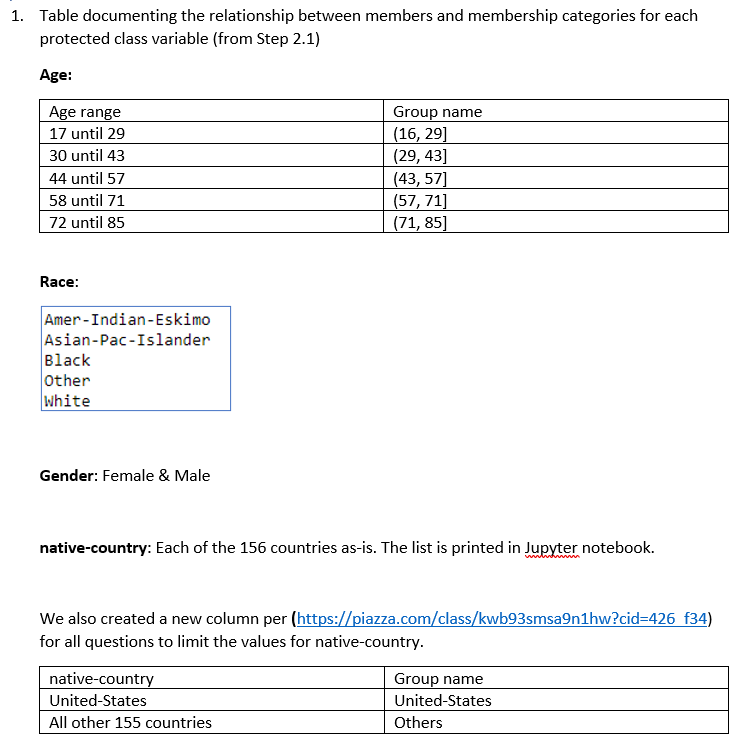

In [9]:
# print("Race")
print(df.groupby('race').size())

race
Black     3817
Other     3277
White    29158
dtype: int64


In [10]:
# print("Sex")
print(df.groupby('gender').size())

gender
Female    16454
Male      19798
dtype: int64


In [11]:
#df.loc[df['age'] == '120 +', 'age'] = 121
df['age'] = pd.to_numeric(df['age']) 
#Convert column to 5 groups to categorize the values
length_interval = np.linspace(df['age'].min()-1,df['age'].max(),6).astype('int')
df['age_group'] = pd.cut(df['age'], length_interval)
print(df['age_group'])

0        (57, 71]
1        (57, 71]
2        (43, 57]
3        (29, 43]
4        (29, 43]
           ...   
36247    (29, 43]
36248    (57, 71]
36249    (29, 43]
36250    (43, 57]
36251    (29, 43]
Name: age_group, Length: 36252, dtype: category
Categories (5, interval[int64, right]): [(16, 29] < (29, 43] < (43, 57] < (57, 71] < (71, 85]]


In [12]:
print(df.groupby('age_group').size())

age_group
(16, 29]     8617
(29, 43]    10676
(43, 57]     9764
(57, 71]     6270
(71, 85]      925
dtype: int64


In [13]:
pd.set_option('display.max_rows', None)
print(df.groupby('native-country').size().sort_values(ascending=False))
pd.set_option('display.max_rows', 100)

native-country
United-States           30937
Mexico                   1249
India                     404
Philippines               240
China                     187
El-Salvador               173
Puerto-Rico               140
Vietnam                   134
Guatemala                 129
Germany                   123
Cuba                      113
Dominican-Republic        109
Canada                    107
Columbia                   99
Honduras                   87
Jamaica                    74
Brazil                     71
Haiti                      69
Pakistan                   64
Venezuela                  64
Korea                      60
Ecuador                    58
Japan                      57
South-Korea                51
Nigeria                    48
Ukraine                    46
Iran                       44
Russia                     43
United-Kingdom             43
Peru                       42
England                    42
Taiwan                     41
Ethiopia                 

In [14]:
df['native-country2'] = df['native-country']

In [15]:
us_others = [x if x == 'United-States' else 'Others' for x in df['native-country2']]

In [16]:
df['native-country2'] = us_others

In [17]:
df.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,coded-income,tax-bracket,income-90k-threshold,occupation_num,salary_expectation_score,age_group,native-country2
36232,57,Private,79514,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,40,United-States,18,3,<=90k,9,369,"(43, 57]",United-States
36233,57,Private,91330,HS-grad,9,Married-spouse-absent,Other-service,Other-relative,Other,Male,40,United-States,17,2,<=90k,9,369,"(43, 57]",United-States
36234,54,Private,102625,Assoc-acdm,12,Divorced,Other-service,Other-relative,Other,Female,99,United-States,11,2,<=90k,9,1197,"(43, 57]",United-States
36235,33,Private,108813,HS-grad,9,Married-civ-spouse,Other-service,Other-relative,Other,Male,40,United-States,7,2,<=90k,9,369,"(29, 43]",United-States
36236,48,Private,97970,Assoc-acdm,12,Widowed,Other-service,Not-in-family,Other,Female,25,United-States,5,2,<=90k,9,309,"(43, 57]",United-States
36237,35,Federal-gov,96289,Prof-school,15,Separated,Prof-specialty,Not-in-family,Other,Male,80,United-States,41,4,>90k,11,1211,"(29, 43]",United-States
36238,30,Private,77248,Assoc-voc,11,Married-spouse-absent,Other-service,Not-in-family,Other,Female,32,United-States,16,2,<=90k,9,361,"(29, 43]",United-States
36239,22,Self-emp-inc,86157,Assoc-voc,11,Never-married,Exec-managerial,Not-in-family,White,Female,30,United-States,4,1,<=90k,10,340,"(16, 29]",United-States
36240,45,Self-emp-not-inc,101115,11th,7,Never-married,Transport-moving,Unmarried,Other,Male,40,United-States,37,4,>90k,6,286,"(43, 57]",United-States
36241,47,Private,106232,Bachelors,13,Never-married,Sales,Not-in-family,Other,Male,45,United-States,27,3,<=90k,7,592,"(43, 57]",United-States


In [18]:
print(df.groupby('native-country2').size().sort_values(ascending=False))

native-country2
United-States    30937
Others            5315
dtype: int64


Q) 2.3
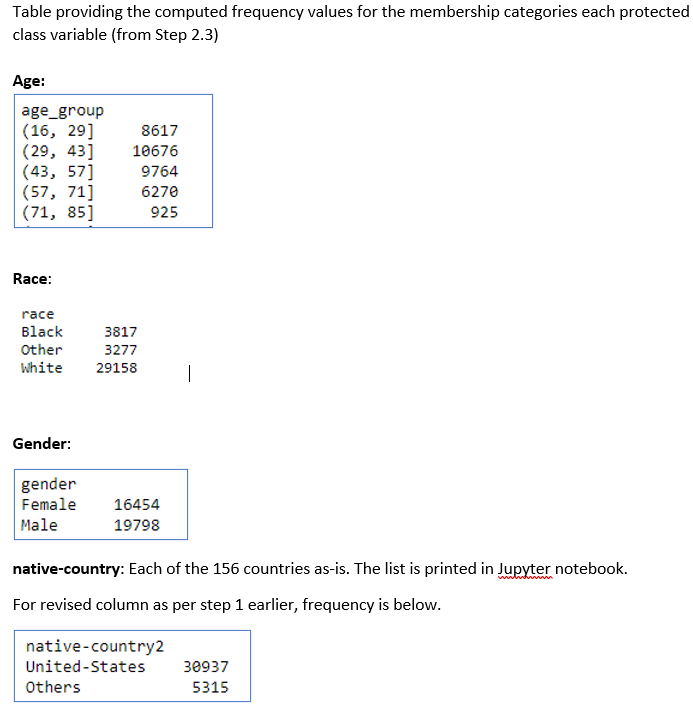

In [19]:
print(df.groupby('income-90k-threshold').size())
#<=50k = 0, >50k = 1

income-90k-threshold
<=90k    29171
>90k      7081
dtype: int64


In [20]:
#length_interval = np.linspace(df['salary_expectation_score'].min()-1,df['salary_expectation_score'].max(),6).astype('int')
length_interval = [14, 350, 500, 1595]
df['salary_expectation_score_group'] = pd.cut(df['salary_expectation_score'], length_interval)
print(df.groupby('salary_expectation_score_group').size())

salary_expectation_score_group
(14, 350]       7875
(350, 500]     14531
(500, 1595]    13846
dtype: int64


In [21]:
df['disIncome'] = np.zeros(df.shape[0],dtype=int)
df.loc[df['income-90k-threshold'] == ">90k", 'disIncome'] = 1
print(df)

       age  workclass  fnlwgt  education  educational-num      marital-status  \
0       63  State-gov  166860    HS-grad                9  Married-civ-spouse   
1       64  Local-gov  111745    HS-grad                9  Married-civ-spouse   
2       54    Private  151825    HS-grad                9            Divorced   
3       37    Private  174690    HS-grad                9       Never-married   
4       35    Private  197229  Assoc-voc               11  Married-civ-spouse   
...    ...        ...     ...        ...              ...                 ...   
36247   41    Private  180857    HS-grad                9  Married-civ-spouse   
36248   58    Private  117245    HS-grad                9  Married-civ-spouse   
36249   31    Private  126498    HS-grad                9       Never-married   
36250   57    Private   72015  Bachelors               13            Divorced   
36251   32    Private   94815    HS-grad                9       Never-married   

             occupation    

Q2.2)
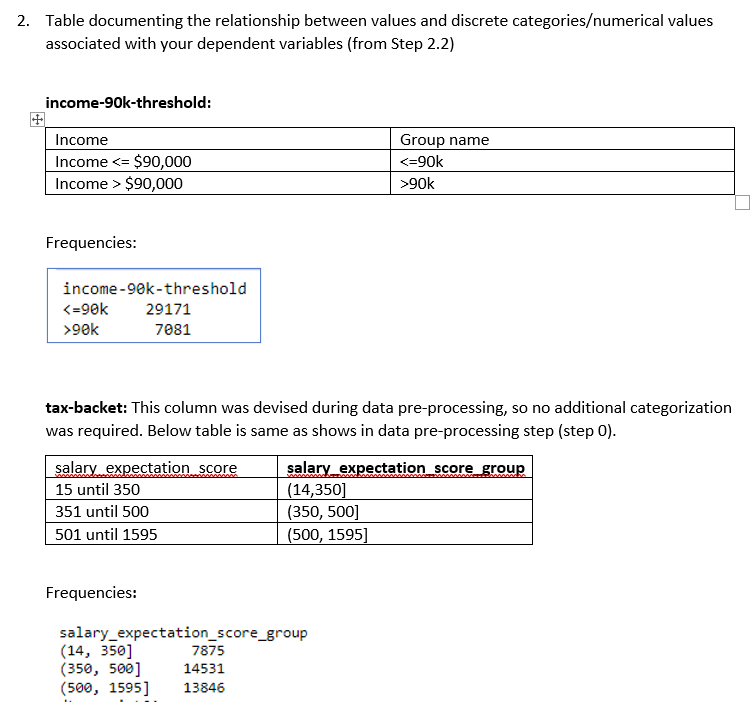

In [22]:
age_income = df.groupby(['age_group','disIncome'])['disIncome'].count().reset_index(name='counts')
age_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(age_income)

  age_group  disIncome  Frequency
0  (16, 29]          0       8158
1  (16, 29]          1        459
2  (29, 43]          0       8513
3  (29, 43]          1       2163
4  (43, 57]          0       7232
5  (43, 57]          1       2532
6  (57, 71]          0       4584
7  (57, 71]          1       1686
8  (71, 85]          0        684
9  (71, 85]          1        241


In [23]:
race_income = df.groupby(['race','disIncome'])['disIncome'].count().reset_index(name='counts')
age_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(race_income)

    race  disIncome  counts
0  Black          0    3352
1  Black          1     465
2  Other          0    2534
3  Other          1     743
4  White          0   23285
5  White          1    5873


In [24]:
gender_income = df.groupby(['gender','disIncome'])['disIncome'].count().reset_index(name='counts')
gender_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(gender_income)

   gender  disIncome  Frequency
0  Female          0      14346
1  Female          1       2108
2    Male          0      14825
3    Male          1       4973


In [25]:
native_country2_income = df.groupby(['native-country2','disIncome'])['disIncome'].count().reset_index(name='counts')
native_country2_income.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(native_country2_income)

  native-country2  disIncome  Frequency
0          Others          0       4273
1          Others          1       1042
2   United-States          0      24898
3   United-States          1       6039


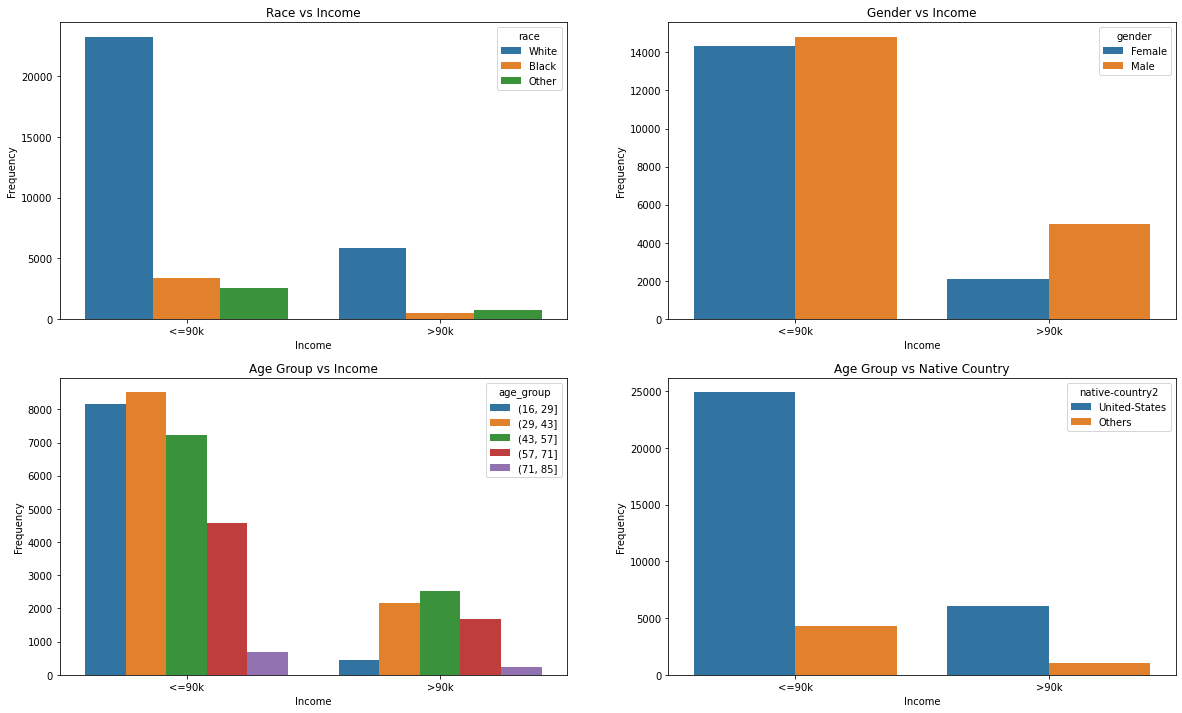

In [26]:

fig = plt.figure(figsize = (20,12))

ax1 = fig.add_subplot(221)
sns.countplot(x='income-90k-threshold', hue='race', data=df,ax=ax1).set_title("Race vs Income")
ax1.set(xlabel = 'Income',ylabel = "Frequency")

ax2 = fig.add_subplot(222)
sns.countplot(x='income-90k-threshold', hue='gender', data=df,ax=ax2).set_title("Gender vs Income")
ax2.set(xlabel = 'Income',ylabel = "Frequency")

ax3 = fig.add_subplot(223)
sns.countplot(x='income-90k-threshold', hue='age_group', data=df,ax=ax3).set_title("Age Group vs Income")
ax3.set(xlabel = 'Income',ylabel = "Frequency")

ax4 = fig.add_subplot(224)
sns.countplot(x='income-90k-threshold', hue='native-country2', data=df,ax=ax4).set_title("Age Group vs Native Country")
ax4.set(xlabel = 'Income',ylabel = "Frequency")

plt.show()

In [27]:
age_income2 = df.groupby(['age_group','salary_expectation_score_group'])['salary_expectation_score_group'].count().reset_index(name='counts')
age_income2.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(age_income2)

   age_group salary_expectation_score_group  Frequency
0   (16, 29]                      (14, 350]       2870
1   (16, 29]                     (350, 500]       3438
2   (16, 29]                    (500, 1595]       2309
3   (29, 43]                      (14, 350]       1603
4   (29, 43]                     (350, 500]       4182
5   (29, 43]                    (500, 1595]       4891
6   (43, 57]                      (14, 350]       1492
7   (43, 57]                     (350, 500]       4107
8   (43, 57]                    (500, 1595]       4165
9   (57, 71]                      (14, 350]       1456
10  (57, 71]                     (350, 500]       2554
11  (57, 71]                    (500, 1595]       2260
12  (71, 85]                      (14, 350]        454
13  (71, 85]                     (350, 500]        250
14  (71, 85]                    (500, 1595]        221


In [28]:
race_income2 = df.groupby(['race','salary_expectation_score_group'])['salary_expectation_score_group'].count().reset_index(name='counts')
age_income2.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(race_income2)

    race salary_expectation_score_group  counts
0  Black                      (14, 350]     856
1  Black                     (350, 500]    1724
2  Black                    (500, 1595]    1237
3  Other                      (14, 350]     639
4  Other                     (350, 500]    1129
5  Other                    (500, 1595]    1509
6  White                      (14, 350]    6380
7  White                     (350, 500]   11678
8  White                    (500, 1595]   11100


In [29]:
gender_income3 = df.groupby(['gender','salary_expectation_score_group'])['salary_expectation_score_group'].count().reset_index(name='counts')
gender_income3.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(gender_income3)

   gender salary_expectation_score_group  Frequency
0  Female                      (14, 350]       4287
1  Female                     (350, 500]       6341
2  Female                    (500, 1595]       5826
3    Male                      (14, 350]       3588
4    Male                     (350, 500]       8190
5    Male                    (500, 1595]       8020


In [30]:
native_country2_income2 = df.groupby(['native-country2','salary_expectation_score_group'])['salary_expectation_score_group'].count().reset_index(name='counts')
native_country2_income2.rename(columns = {'counts':'Frequency'}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(native_country2_income2)

  native-country2 salary_expectation_score_group  Frequency
0          Others                      (14, 350]       1500
1          Others                     (350, 500]       1744
2          Others                    (500, 1595]       2071
3   United-States                      (14, 350]       6375
4   United-States                     (350, 500]      12787
5   United-States                    (500, 1595]      11775


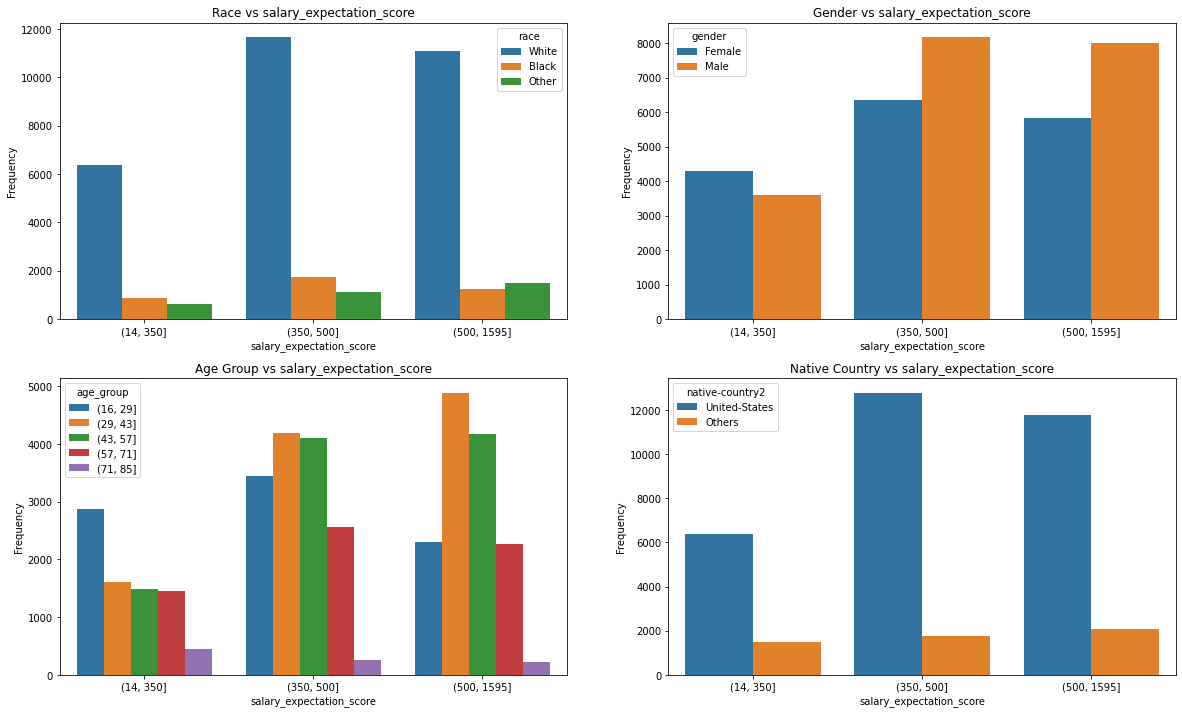

In [31]:
fig = plt.figure(figsize = (20,12))

ax1 = fig.add_subplot(221)
sns.countplot(x='salary_expectation_score_group', hue='race', data=df,ax=ax1).set_title("Race vs salary_expectation_score")
ax1.set(xlabel = 'salary_expectation_score',ylabel = "Frequency")

ax2 = fig.add_subplot(222)
sns.countplot(x='salary_expectation_score_group', hue='gender', data=df,ax=ax2).set_title("Gender vs salary_expectation_score")
ax2.set(xlabel = 'salary_expectation_score',ylabel = "Frequency")

ax3 = fig.add_subplot(223)
sns.countplot(x='salary_expectation_score_group', hue='age_group', data=df,ax=ax3).set_title("Age Group vs salary_expectation_score")
ax3.set(xlabel = 'salary_expectation_score',ylabel = "Frequency")

ax4 = fig.add_subplot(224)
sns.countplot(x='salary_expectation_score_group', hue='native-country2', data=df,ax=ax4).set_title("Native Country vs salary_expectation_score")
ax4.set(xlabel = 'salary_expectation_score',ylabel = "Frequency")

plt.show()

# Step 3
1. Privileged Group: {Race: White, Gender: male, Age group: (43,57], Native Country: United-States}
2. Unprivileged Group: {Race: Black, Gender: female, Age group: (16,29], Native Country: Others}

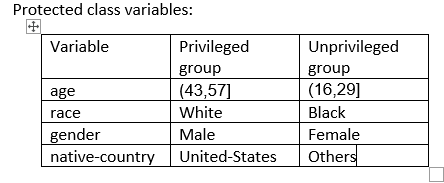

## Chosen Fairness Metrics
### Disparate Impact Metric & Statistical Parity Difference

In [32]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['race'] == 'White'),
 (df['salary_expectation_score'] < 350) & (df['race'] == 'White'),
 (df['salary_expectation_score'] >= 350) & (df['race'] == 'Black'),
 (df['salary_expectation_score'] < 350) & (df['race'] == 'Black')
 ]
choices = ['white_approved', 'white_declined', 'black_approved', 'black_declined']
df['approval/declined_list'] = np.select(cases, choices)
df.groupby(['approval/declined_list'])['approval/declined_list'].count()
# df.race.unique()

approval/declined_list
0                  3277
black_approved     2961
black_declined      856
white_approved    22794
white_declined     6364
Name: approval/declined_list, dtype: int64

In [33]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['gender'] == 'Male'),
 (df['salary_expectation_score'] < 350) & (df['gender'] == 'Male'),
 (df['salary_expectation_score'] >= 350) & (df['gender'] == 'Female'),
 (df['salary_expectation_score'] < 350) & (df['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df['gender_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['gender_salaryWorthiness_list'])['gender_salaryWorthiness_list'].count()
# df.gender.unique()

gender_salaryWorthiness_list
female_approved    12178
female_declined     4276
male_approved      16216
male_declined       3582
Name: gender_salaryWorthiness_list, dtype: int64

In [34]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['age'] > 16) & (df['age'] < 30),
 (df['salary_expectation_score'] < 350) & (df['age'] > 16) & (df['age'] < 30),
 (df['salary_expectation_score'] >= 350) & (df['age'] > 44) & (df['age'] < 58),
 (df['salary_expectation_score'] < 350) & (df['age'] > 44) & (df['age'] < 58),
    
 ]
choices = ['younger_approved', 'younger_declined', 'older_approved', 'older_declined']
df['age_group_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['age_group_salaryWorthiness_list'])['age_group_salaryWorthiness_list'].count()

age_group_salaryWorthiness_list
0                   18513
older_approved       7713
older_declined       1409
younger_approved     5751
younger_declined     2866
Name: age_group_salaryWorthiness_list, dtype: int64

In [35]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['native-country2'] == 'United-States'),
 (df['salary_expectation_score'] < 350) & (df['native-country2'] == 'United-States'),
 (df['salary_expectation_score'] >= 350) & (df['native-country2'] == 'Others'),
 (df['salary_expectation_score'] < 350) & (df['native-country2'] == 'Others')
 ]
choices = ['US_approved', 'US_declined', 'Others_approved', 'Others_declined']
df['native_country_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['native_country_salaryWorthiness_list'])['gender_salaryWorthiness_list'].count()

native_country_salaryWorthiness_list
Others_approved     3816
Others_declined     1499
US_approved        24578
US_declined         6359
Name: gender_salaryWorthiness_list, dtype: int64

In [36]:
cases = [
 (df['disIncome'] ==0) & (df['race'] == 'White'),
 (df['disIncome'] ==1) & (df['race'] == 'White'),
 (df['disIncome'] ==0) & (df['race'] == 'Black'),
 (df['disIncome'] == 1) & (df['race'] == 'Black')
 ]
choices = ['white_approved', 'white_declined', 'black_approved', 'black_declined']
df['raceVsIncome_list'] = np.select(cases, choices)
df.groupby(['raceVsIncome_list'])['raceVsIncome_list'].count()

raceVsIncome_list
0                  3277
black_approved     3352
black_declined      465
white_approved    23285
white_declined     5873
Name: raceVsIncome_list, dtype: int64

In [37]:
cases = [
 (df['disIncome'] ==0) &  (df['gender'] == 'Male'),
 (df['disIncome'] ==1) &  (df['gender'] == 'Male'),
 (df['disIncome'] ==0) & (df['gender'] == 'Female'),
 (df['disIncome'] == 1) & (df['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df['genderVsIncome_list'] = np.select(cases, choices)
df.groupby(['genderVsIncome_list'])['genderVsIncome_list'].count()

genderVsIncome_list
female_approved    14346
female_declined     2108
male_approved      14825
male_declined       4973
Name: genderVsIncome_list, dtype: int64

In [38]:
cases = [
 (df['disIncome'] ==0) & (df['age'] > 17) & (df['age'] < 30),
 (df['disIncome'] ==1) & (df['age'] > 17) & (df['age'] < 30),
 (df['disIncome'] ==0) & (df['age'] > 44) & (df['age'] < 57),
 (df['disIncome'] ==1) & (df['age'] > 44) & (df['age'] < 57),
    
 ]
choices = ['older_approved', 'older_declined', 'younger_approved', 'younger_declined']
df['ageVsIncome_list'] = np.select(cases, choices)
df.groupby(['ageVsIncome_list'])['ageVsIncome_list'].count()

ageVsIncome_list
0                   19478
older_approved       7919
older_declined        459
younger_approved     6216
younger_declined     2180
Name: ageVsIncome_list, dtype: int64

In [39]:
cases = [
 (df['disIncome'] ==0) &  (df['native-country2'] == 'United-States'),
 (df['disIncome'] ==1) &  (df['native-country2'] == 'United-States'),
 (df['disIncome'] ==0) & (df['native-country2'] == 'Others'),
 (df['disIncome'] == 1) & (df['native-country2'] == 'Others')
 ]
choices = ['US_approved', 'US_declined', 'Others_approved', 'Others_declined']
df['native_countryVsIncome_list'] = np.select(cases, choices)
df.groupby(['native_countryVsIncome_list'])['genderVsIncome_list'].count()

native_countryVsIncome_list
Others_approved     4273
Others_declined     1042
US_approved        24898
US_declined         6039
Name: genderVsIncome_list, dtype: int64

Disparate Impact Metric - Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.

Fairness for this metric is between 0.8 and 1.25  
The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group.

Statistical Parity Difference - Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.

The ideal value of this metric is 0  
Fairness for this metric is between -0.1 and 0.1

# Race

1. Disparate Impact Metric for Race vs salary_expectation_score

Rate of favorable outcome for the privileged group : 22794/(22794 + 6364) = 0.7817  
Rate of favorable outcome for the unprivileged group : 2961/(2961 + 856) = 0.7757  
Disparate Impact Metric : 0.9923  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. But, the metric values are within acceptable range.

2. Disparate Impact Metric for Race vs  Income Bracket

Rate of favorable outcome for the privileged group : 23285/(23285 + 5873) = 0.7985  
Rate of favorable outcome for the unprivileged group : 3352/(3352 + 465) = 0.8781  
Disparate Impact Metric : 1.099  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

3. Statistical Parity Difference for Race vs salary_expectation_score

Rate of favorable outcome for the privileged group : 22794/(22794 + 6364) = 0.7817  
Rate of favorable outcome for the unprivileged group : 2961/(2961 + 856) = 0.7757  
Statistical Parity Difference Metric: - 0.006   

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. But, the metric values are within acceptable range.

4. Statistical Parity Difference for Race vs  Income Bracket

Rate of favorable outcome for the privileged group : 23285/(23285 + 5873) = 0.7985  
Rate of favorable outcome for the unprivileged group : 3352/(3352 + 465) = 0.8781  
Statistical Parity Difference Metric: 0.0796  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

# Gender

5. Disparate Impact Metric for Gender vs salary_expectation_score

Rate of favorable outcome for the privileged group : 16216/(16216 + 3582) = 0.8191  
Rate of favorable outcome for the unprivileged group : 12178/(12178 + 4276) = 0.7401  
Disparate Impact Metric : 0.9035  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. But, the metric values are within acceptable range.

6. Disparate Impact Metric for Gender vs  Income Bracket

Rate of favorable outcome for the privileged group : 14825/(14825 + 4973) = 0.7417  
Rate of favorable outcome for the unprivileged group : 14346/(14346 + 2108) = 0.8718  
Disparate Impact Metric : 1.175  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

7. Statistical Parity Difference for Gender vs salary_expectation_score

Rate of favorable outcome for the privileged group : 16216/(16216 + 3582) = 0.8191  
Rate of favorable outcome for the unprivileged group : 12178/(12178 + 4276) = 0.7401  
Statistical Parity Difference Metric: - 0.079  


There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. But, the metric values are within acceptable range.

8. Statistical Parity Difference for Gender vs  Income Bracket

Rate of favorable outcome for the privileged group : 14825/(14825 + 4973) = 0.7417  
Rate of favorable outcome for the unprivileged group : 14346/(14346 + 2108) = 0.8718  
Statistical Parity Difference Metric: 0.1301  


There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. The metric values are not within acceptable range.

# AGE-Group

9. Disparate Impact Metric for Age group vs salary_expectation_score
 
Rate of favorable outcome for the privileged group : 7713/(7713 + 1409) = 0.8455  
Rate of favorable outcome for the unprivileged group : 5751/(5751 + 2866) = 0.6674  
Disparate Impact Metric : 0.7893  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are not within acceptable range.

10. Disparate Impact Metric for Age group vs Income Bracket

Rate of favorable outcome for the privileged group : 7919/(7919 + 459) = 0.9452  
Rate of favorable outcome for the unprivileged group : 6216/(6216 + 2180) = 0.7403  
Disparate Impact Metric : 0.7832  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are not within acceptable range.

11. Statistical Parity Difference for Age group vs salary_expectation_score

Rate of favorable outcome for the privileged group : 7713/(7713 + 1409) = 0.8455  
Rate of favorable outcome for the unprivileged group : 5751/(5751 + 2866) = 0.6674  
Statistical Parity Difference Metric: -0.1781  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are not within acceptable range.

12. Statistical Parity Difference for Age group vs  Income Bracket

Rate of favorable outcome for the privileged group : 7919/(7919 + 459) = 0.9452  
Rate of favorable outcome for the unprivileged group : 6216/(6216 + 2180) = 0.7403  
Statistical Parity Difference Metric: -0.2049  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are not within acceptable range.

# Native Country

9. Disparate Impact Metric for Native Country vs salary_expectation_score

Rate of favorable outcome for the privileged group : 24578/(24578 + 6359) = 0.7944  
Rate of favorable outcome for the unprivileged group : 3816/(3816 + 1499) = 0.7179  
Disparate Impact Metric : 0.9037  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are within acceptable range.

10. Disparate Impact Metric for Native Country vs Income Bracket

Rate of favorable outcome for the privileged group : 24898/(24898 + 6039) = 0.8047  
Rate of favorable outcome for the unprivileged group : 4273/(4273 + 1042) = 0.8039  
Disparate Impact Metric : 0.9990 i.e. ~1.0  

This is close to 1 thus there is no bias.

11. Statistical Parity Difference for Native Country vs salary_expectation_score

Rate of favorable outcome for the privileged group : 24578/(24578 + 6359) = 0.7944  
Rate of favorable outcome for the unprivileged group : 3816/(3816 + 1499) = 0.7179  
Statistical Parity Difference Metric: -0.0765  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are within acceptable range.

12. Statistical Parity Difference for Native Country vs  Income Bracket

Rate of favorable outcome for the privileged group : 24898/(24898 + 6039) = 0.8047  
Rate of favorable outcome for the unprivileged group : 4273/(4273 + 1042) = 0.8039  
Disparate Impact Metric : 0  

This is close to 0 thus there is no bias.

In [40]:
df.reset_index()

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,...,salary_expectation_score_group,disIncome,approval/declined_list,gender_salaryWorthiness_list,age_group_salaryWorthiness_list,native_country_salaryWorthiness_list,raceVsIncome_list,genderVsIncome_list,ageVsIncome_list,native_countryVsIncome_list
0,0,63,State-gov,166860,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,...,"(350, 500]",0,white_approved,female_approved,0,US_approved,white_approved,female_approved,0,US_approved
1,1,64,Local-gov,111745,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,...,"(350, 500]",0,white_approved,male_approved,0,US_approved,white_approved,male_approved,0,US_approved
2,2,54,Private,151825,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,...,"(350, 500]",0,white_approved,female_approved,older_approved,US_approved,white_approved,female_approved,younger_approved,US_approved
3,3,37,Private,174690,HS-grad,9,Never-married,Other-service,Own-child,White,...,"(14, 350]",0,white_declined,male_declined,0,US_declined,white_approved,male_approved,0,US_approved
4,4,35,Private,197229,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,White,...,"(350, 500]",0,white_approved,female_approved,0,US_approved,white_approved,female_approved,0,US_approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36247,36247,41,Private,180857,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Other,...,"(350, 500]",1,0,male_approved,0,US_approved,0,male_declined,0,US_declined
36248,36248,58,Private,117245,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Other,...,"(500, 1595]",1,0,male_approved,0,US_approved,0,male_declined,0,US_declined
36249,36249,31,Private,126498,HS-grad,9,Never-married,Other-service,Other-relative,Other,...,"(350, 500]",0,0,female_approved,0,US_approved,0,female_approved,0,US_approved
36250,36250,57,Private,72015,Bachelors,13,Divorced,Transport-moving,Unmarried,Other,...,"(500, 1595]",1,0,female_approved,older_approved,US_approved,0,female_declined,0,US_declined


In [61]:
# reweight and discard some of the records for privilege group for age

In [115]:
np.random.random_sample()

0.23908255336588402

In [151]:
df_backup2 = df_backup.copy()

In [275]:
df = df_backup.copy()

In [276]:
keep = []
for idx, row in df.iterrows():
    #if np.logical_and(np.logical_and(row['age'] > 44,row['age'] < 58),row['salary_expectation_score'] >350):
    if row['salary_expectation_score'] >350 and row['age'] < 30:
        if np.random.random_sample() < 0.3:
            keep.append(0)
        else:
            keep.append(1)
    else:
            keep.append(1)

In [277]:
sum(keep)

28366

In [278]:
df_backup = df_backup.copy()

In [279]:
df['keep'] = keep
df = df[df['keep'] == 1]

In [280]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['race'] == 'White'),
 (df['salary_expectation_score'] < 350) & (df['race'] == 'White'),
 (df['salary_expectation_score'] >= 350) & (df['race'] == 'Black'),
 (df['salary_expectation_score'] < 350) & (df['race'] == 'Black')
 ]
choices = ['white_approved', 'white_declined', 'black_approved', 'black_declined']
df['approval/declined_list'] = np.select(cases, choices)
df.groupby(['approval/declined_list'])['approval/declined_list'].count()

approval/declined_list
0                  2547
black_approved     2119
black_declined      856
white_approved    16480
white_declined     6364
Name: approval/declined_list, dtype: int64

In [281]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['gender'] == 'Male'),
 (df['salary_expectation_score'] < 350) & (df['gender'] == 'Male'),
 (df['salary_expectation_score'] >= 350) & (df['gender'] == 'Female'),
 (df['salary_expectation_score'] < 350) & (df['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df['gender_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['gender_salaryWorthiness_list'])['gender_salaryWorthiness_list'].count()
# df.gender.unique()

gender_salaryWorthiness_list
female_approved     8748
female_declined     4276
male_approved      11760
male_declined       3582
Name: gender_salaryWorthiness_list, dtype: int64

In [282]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['age'] > 16) & (df['age'] < 30),
 (df['salary_expectation_score'] < 350) & (df['age'] > 16) & (df['age'] < 30),
 (df['salary_expectation_score'] >= 350) & (df['age'] > 44) & (df['age'] < 58),
 (df['salary_expectation_score'] < 350) & (df['age'] > 44) & (df['age'] < 58),
    
 ]
choices = ['younger_approved', 'younger_declined', 'older_approved', 'older_declined']
df['age_group_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['age_group_salaryWorthiness_list'])['age_group_salaryWorthiness_list'].count()

age_group_salaryWorthiness_list
0                   18513
older_approved       1555
older_declined       1409
younger_approved     4023
younger_declined     2866
Name: age_group_salaryWorthiness_list, dtype: int64

In [283]:
cases = [
 (df['salary_expectation_score'] >= 350) & (df['native-country2'] == 'United-States'),
 (df['salary_expectation_score'] < 350) & (df['native-country2'] == 'United-States'),
 (df['salary_expectation_score'] >= 350) & (df['native-country2'] == 'Others'),
 (df['salary_expectation_score'] < 350) & (df['native-country2'] == 'Others')
 ]
choices = ['US_approved', 'US_declined', 'Others_approved', 'Others_declined']
df['native_country_salaryWorthiness_list'] = np.select(cases, choices)
df.groupby(['native_country_salaryWorthiness_list'])['gender_salaryWorthiness_list'].count()

native_country_salaryWorthiness_list
Others_approved     2686
Others_declined     1499
US_approved        17822
US_declined         6359
Name: gender_salaryWorthiness_list, dtype: int64

In [284]:
cases = [
 (df['disIncome'] ==0) & (df['race'] == 'White'),
 (df['disIncome'] ==1) & (df['race'] == 'White'),
 (df['disIncome'] ==0) & (df['race'] == 'Black'),
 (df['disIncome'] == 1) & (df['race'] == 'Black')
 ]
choices = ['white_approved', 'white_declined', 'black_approved', 'black_declined']
df['raceVsIncome_list'] = np.select(cases, choices)
df.groupby(['raceVsIncome_list'])['raceVsIncome_list'].count()

raceVsIncome_list
0                  2547
black_approved     2651
black_declined      324
white_approved    18582
white_declined     4262
Name: raceVsIncome_list, dtype: int64

In [285]:
cases = [
 (df['disIncome'] ==0) &  (df['gender'] == 'Male'),
 (df['disIncome'] ==1) &  (df['gender'] == 'Male'),
 (df['disIncome'] ==0) & (df['gender'] == 'Female'),
 (df['disIncome'] == 1) & (df['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df['genderVsIncome_list'] = np.select(cases, choices)
df.groupby(['genderVsIncome_list'])['genderVsIncome_list'].count()

genderVsIncome_list
female_approved    11502
female_declined     1522
male_approved      11743
male_declined       3599
Name: genderVsIncome_list, dtype: int64

In [286]:
cases = [
 (df['disIncome'] ==0) & (df['age'] > 17) & (df['age'] < 30),
 (df['disIncome'] ==1) & (df['age'] > 17) & (df['age'] < 30),
 (df['disIncome'] ==0) & (df['age'] > 44) & (df['age'] < 57),
 (df['disIncome'] ==1) & (df['age'] > 44) & (df['age'] < 57),
    
 ]
choices = ['older_approved', 'older_declined', 'younger_approved', 'younger_declined']
df['ageVsIncome_list'] = np.select(cases, choices)
df.groupby(['ageVsIncome_list'])['ageVsIncome_list'].count()

ageVsIncome_list
0                   18989
older_approved       6311
older_declined        341
younger_approved     2244
younger_declined      481
Name: ageVsIncome_list, dtype: int64

In [287]:
cases = [
 (df['disIncome'] ==0) &  (df['native-country2'] == 'United-States'),
 (df['disIncome'] ==1) &  (df['native-country2'] == 'United-States'),
 (df['disIncome'] ==0) & (df['native-country2'] == 'Others'),
 (df['disIncome'] == 1) & (df['native-country2'] == 'Others')
 ]
choices = ['US_approved', 'US_declined', 'Others_approved', 'Others_declined']
df['native_countryVsIncome_list'] = np.select(cases, choices)
df.groupby(['native_countryVsIncome_list'])['genderVsIncome_list'].count()

native_countryVsIncome_list
Others_approved     3447
Others_declined      738
US_approved        19798
US_declined         4383
Name: genderVsIncome_list, dtype: int64

Disparate Impact Metric - Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.

Fairness for this metric is between 0.8 and 1.25  
The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group.

Statistical Parity Difference - Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.

The ideal value of this metric is 0  
Fairness for this metric is between -0.1 and 0.1

# Race

In [307]:
0.8910-0.8134

0.0776

1. Disparate Impact Metric for Race vs salary_expectation_score

Rate of favorable outcome for the privileged group : 16480/(16480 + 6364) = 0.7214  
Rate of favorable outcome for the unprivileged group : 2119/(2119 + 856) = 0.7122  
Disparate Impact Metric : 0.9872  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. But, the metric values are within acceptable range.

2. Disparate Impact Metric for Race vs  Income Bracket

Rate of favorable outcome for the privileged group : 18582/(18582 + 4262) = 0.8134  
Rate of favorable outcome for the unprivileged group : 2651/(2651 + 324) = 0.8910  
Disparate Impact Metric : 1.0954  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

3. Statistical Parity Difference for Race vs salary_expectation_score

Rate of favorable outcome for the privileged group : 16480/(16480 + 6364) = 0.7214  
Rate of favorable outcome for the unprivileged group : 2119/(2119 + 856) = 0.7122  
Statistical Parity Difference Metric: -0.0091  

This is close to 0 thus there is no bias.

4. Statistical Parity Difference for Race vs  Income Bracket

Rate of favorable outcome for the privileged group : 18582/(18582 + 4262) = 0.8134  
Rate of favorable outcome for the unprivileged group : 2651/(2651 + 324) = 0.8910  
Statistical Parity Difference Metric: 0.0776  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

# Gender

In [311]:
0.8831-0.7654

0.11770000000000003

5. Disparate Impact Metric for Gender vs salary_expectation_score

Rate of favorable outcome for the privileged group : 11760/(11760 + 3582) = 0.7665  
Rate of favorable outcome for the unprivileged group : 8748/(8748 + 4276) = 0.6716  
Disparate Impact Metric : 0.8761  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. But, the metric values are within acceptable range.

6. Disparate Impact Metric for Gender vs  Income Bracket

Rate of favorable outcome for the privileged group : 11743/(11743 + 3599) = 0.7654  
Rate of favorable outcome for the unprivileged group : 11502/(11502 + 1522) = 0.8831  
Disparate Impact Metric : 1.1537  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

7. Statistical Parity Difference for Gender vs salary_expectation_score

Rate of favorable outcome for the privileged group : 11760/(11760 + 3582) = 0.7665  
Rate of favorable outcome for the unprivileged group : 8748/(8748 + 4276) = 0.6716  
Statistical Parity Difference Metric: -0.0948  


There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. But, the metric values are within acceptable range.

8. Statistical Parity Difference for Gender vs  Income Bracket

Rate of favorable outcome for the privileged group : 11743/(11743 + 3599) = 0.7654  
Rate of favorable outcome for the unprivileged group : 11502/(11502 + 1522) = 0.8831  
Statistical Parity Difference Metric: 0.1177  


There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. The metric values are not within acceptable range.

# AGE-Group

In [316]:
0.8234-0.9487

-0.12529999999999997

9. Disparate Impact Metric for Age group vs salary_expectation_score

Rate of favorable outcome for the privileged group : 1555/(1555 + 1409) = 0.5246  
Rate of favorable outcome for the unprivileged group : 4023/(4023 + 2866) = 0.5839  
Disparate Impact Metric : 1.1130  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group.

10. Disparate Impact Metric for Age group vs Income Bracket

Rate of favorable outcome for the privileged group : 6311/(6311 + 341) = 0.9487  
Rate of favorable outcome for the unprivileged group : 2244/(2244 + 481) = 0.8234  
Disparate Impact Metric : 0.8679  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are within acceptable range.

11. Statistical Parity Difference for Age group vs salary_expectation_score

Rate of favorable outcome for the privileged group : 1555/(1555 + 1409) = 0.5246  
Rate of favorable outcome for the unprivileged group : 4023/(4023 + 2866) = 0.5839  
Statistical Parity Difference Metric: 0.0593  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. The metric values are not within acceptable range.

12. Statistical Parity Difference for Age group vs  Income Bracket

Rate of favorable outcome for the privileged group : 6311/(6311 + 341) = 0.9487  
Rate of favorable outcome for the unprivileged group : 2244/(2244 + 481) = 0.8234  
Statistical Parity Difference Metric: -0.1252  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are not within acceptable range.

# Native Country

In [320]:
0.8236-0.8187

0.0049000000000000155

9. Disparate Impact Metric for Native Country vs salary_expectation_score

Rate of favorable outcome for the privileged group : 17822/(17822 + 6359) = 0.7370  
Rate of favorable outcome for the unprivileged group : 2686/(2686 + 1499) = 0.6418  
Disparate Impact Metric : 0.8708  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are within acceptable range.

10. Disparate Impact Metric for Native Country vs Income Bracket

Rate of favorable outcome for the privileged group : 19798/(19798 + 4383) = 0.8187  
Rate of favorable outcome for the unprivileged group : 3447/(3447 + 738) = 0.8236  
Disparate Impact Metric : 1.0059 i.e. ~1.0  

This is close to 1 thus there is no bias.

11. Statistical Parity Difference for Native Country vs salary_expectation_score

Rate of favorable outcome for the privileged group : 17822/(17822 + 6359) = 0.7370  
Rate of favorable outcome for the unprivileged group : 2686/(2686 + 1499) = 0.6418  
Statistical Parity Difference Metric: -0.0951  

There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group. The metric values are within acceptable range.

12. Statistical Parity Difference for Native Country vs  Income Bracket

Rate of favorable outcome for the privileged group : 19798/(19798 + 4383) = 0.8187  
Rate of favorable outcome for the unprivileged group : 3447/(3447 + 738) = 0.8236  
Disparate Impact Metric : 0.0049  

This is close to 0 thus there is no bias.

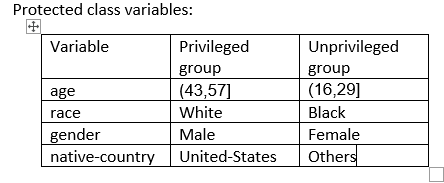

Q) the pre-processing bias mitigation function selected  
A) Reweighting

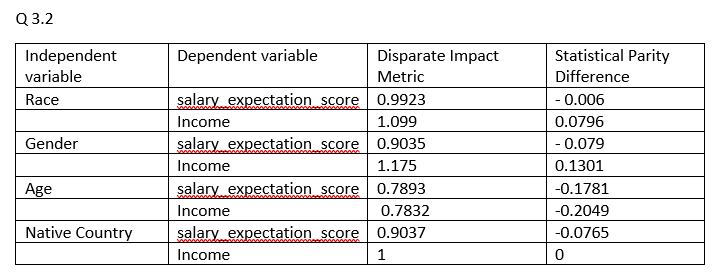

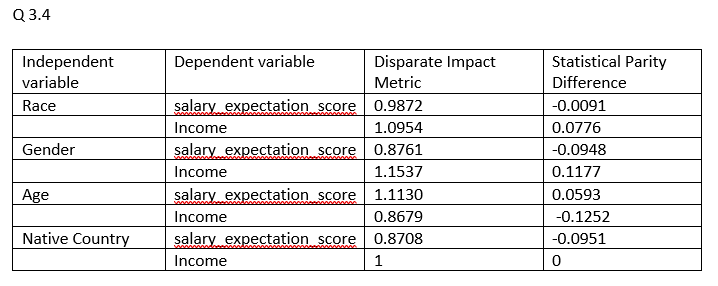

## step 4A

#### Q1 the privileged/unprivileged groups  
Male as privileged and Female as unprivileged group for gender as protected class

#### Q2 dependent variable
income-90k-threshold

original dataset - df_backup  
transformed dataset - df

In [326]:
df_orig = df_backup.copy()

In [335]:
df_orig_train, df_orig_test= train_test_split(df_orig, test_size=0.5)
df_transf_train, df_transf_test= train_test_split(df, test_size=0.5)

In [328]:
df_orig_train.shape

(15047, 30)

In [329]:
df_transf_train.shape

(14183, 30)

In [348]:
df_orig_train.iloc[:,5:]

,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,coded-income,tax-bracket,income-90k-threshold,...,approval/declined_list,gender_salaryWorthiness_list,age_group_salaryWorthiness_list,native_country_salaryWorthiness_list,raceVsIncome_list,genderVsIncome_list,ageVsIncome_list,native_countryVsIncome_list,keep,race2
17833,Never-married,Prof-specialty,Not-in-family,White,Male,48,United-States,19,3,<=90k,...,white_approved,male_approved,0,US_approved,white_approved,male_approved,0,US_approved,1,2
23029,Never-married,Other-service,Not-in-family,White,Female,40,United-States,11,2,<=90k,...,white_approved,female_approved,younger_approved,US_approved,white_approved,female_approved,older_approved,US_approved,1,2
19639,Divorced,Other-service,Not-in-family,White,Male,20,United-States,15,2,<=90k,...,white_declined,male_declined,0,US_declined,white_approved,male_approved,0,US_approved,1,2
18113,Never-married,Prof-specialty,Not-in-family,White,Male,40,United-States,7,2,<=90k,...,white_approved,male_approved,0,US_approved,white_approved,male_approved,0,US_approved,1,2
14177,Never-married,Exec-managerial,Not-in-family,White,Male,50,United-States,31,3,<=90k,...,white_approved,male_approved,younger_approved,US_approved,white_approved,male_approved,older_approved,US_approved,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28232,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,18,3,<=90k,...,white_approved,male_approved,younger_approved,US_approved,white_approved,male_approved,older_approved,US_approved,1,2
11126,Never-married,Transport-moving,Not-in-family,Black,Male,40,United-States,5,2,<=90k,...,black_approved,male_approved,younger_approved,US_approved,black_approved,male_approved,older_approved,US_approved,1,0
29737,Never-married,Prof-specialty,Own-child,White,Male,12,United-States,5,2,<=90k,...,white_declined,male_declined,younger_declined,US_declined,white_approved,male_approved,older_approved,US_approved,1,2
3389,Never-married,Transport-moving,Other-relative,Other,Male,40,United-States,8,2,<=90k,...,0,male_approved,younger_approved,US_approved,0,male_approved,older_approved,US_approved,1,1


In [350]:
labelencoder = LabelEncoder()
df_orig_train['race2'] = labelencoder.fit_transform(df_orig_train['race'])
df_orig_train['workclass2'] = labelencoder.fit_transform(df_orig_train['workclass'])
df_orig_train['education2'] = labelencoder.fit_transform(df_orig_train['education'])
df_orig_train['occupation2'] = labelencoder.fit_transform(df_orig_train['occupation'])
df_orig_train['gender2'] = labelencoder.fit_transform(df_orig_train['gender'])

In [351]:
df_orig_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,raceVsIncome_list,genderVsIncome_list,ageVsIncome_list,native_countryVsIncome_list,keep,race2,workclass2,education2,occupation2,gender2
17833,33,Private,759553,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,...,white_approved,male_approved,0,US_approved,1,2,2,9,8,1
23029,21,Private,313791,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,...,white_approved,female_approved,older_approved,US_approved,1,2,2,15,6,0
19639,69,Local-gov,418900,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,...,white_approved,male_approved,0,US_approved,1,2,1,11,6,1
18113,30,Self-emp-not-inc,844684,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,...,white_approved,male_approved,0,US_approved,1,2,4,9,8,1
14177,27,Private,427790,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,...,white_approved,male_approved,older_approved,US_approved,1,2,2,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28232,28,Private,475148,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,...,white_approved,male_approved,older_approved,US_approved,1,2,2,11,6,1
11126,23,Private,379998,HS-grad,9,Never-married,Transport-moving,Not-in-family,Black,Male,...,black_approved,male_approved,older_approved,US_approved,1,0,2,11,10,1
29737,22,Private,160597,HS-grad,9,Never-married,Prof-specialty,Own-child,White,Male,...,white_approved,male_approved,older_approved,US_approved,1,2,2,11,8,1
3389,29,Private,669636,Bachelors,13,Never-married,Transport-moving,Other-relative,Other,Male,...,0,male_approved,older_approved,US_approved,1,1,2,9,10,1


In [352]:
df_transf_train['race2'] = labelencoder.fit_transform(df_transf_train['race'])
df_transf_train['workclass2'] = labelencoder.fit_transform(df_transf_train['workclass'])
df_transf_train['education2'] = labelencoder.fit_transform(df_transf_train['education'])
df_transf_train['occupation2'] = labelencoder.fit_transform(df_transf_train['occupation'])
df_transf_train['gender2'] = labelencoder.fit_transform(df_transf_train['gender'])
df_transf_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,raceVsIncome_list,genderVsIncome_list,ageVsIncome_list,native_countryVsIncome_list,keep,race2,workclass2,education2,occupation2,gender2
12208,43,Local-gov,72377,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,white_approved,female_approved,0,US_approved,1,2,1,11,6,0
6583,33,Private,725106,HS-grad,9,Never-married,Other-service,Own-child,White,Female,...,white_approved,female_approved,0,US_approved,1,2,2,11,6,0
746,37,Self-emp-not-inc,100300,Assoc-acdm,12,Married-civ-spouse,Other-service,Wife,White,Female,...,white_approved,female_approved,0,US_approved,1,2,4,7,6,0
28086,64,Private,363954,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,...,white_approved,female_approved,0,US_approved,1,2,2,11,0,0
18313,58,Private,415481,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,white_declined,female_declined,0,US_declined,1,2,2,15,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12276,40,Private,46240,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,...,white_approved,male_approved,0,US_approved,1,2,2,11,10,1
247,23,Private,173568,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,...,white_approved,male_approved,older_approved,US_approved,1,2,2,9,6,1
5579,56,Self-emp-inc,539059,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,white_declined,male_declined,younger_declined,US_declined,1,2,3,14,4,1
12629,40,Private,137018,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,...,white_approved,female_approved,0,US_approved,1,2,2,7,8,0


In [358]:
x_cols = ['age','educational-num','race2','workclass2','occupation2','gender2','hours-per-week']
y_cols = ['income-90k-threshold']

In [359]:
df_orig_train_X = df_orig_train.loc[:, x_cols]
df_orig_train_Y = df_orig_train.loc[:, y_cols]
df_transf_train_X = df_transf_train.loc[:, x_cols]
df_transf_train_Y = df_transf_train.loc[:, y_cols]

In [360]:
df_orig_train_X

,age,educational-num,race2,workclass2,occupation2,gender2,hours-per-week
17833,33,13,2,2,8,1,48
23029,21,10,2,2,6,0,40
19639,69,9,2,1,6,1,20
18113,30,13,2,4,8,1,40
14177,27,13,2,2,4,1,50
...,...,...,...,...,...,...,...
28232,28,9,2,2,6,1,40
11126,23,9,0,2,10,1,40
29737,22,9,2,2,8,1,12
3389,29,13,1,2,10,1,40


In [361]:
df_orig_train_Y

,income-90k-threshold
17833,<=90k
23029,<=90k
19639,<=90k
18113,<=90k
14177,<=90k
...,...
28232,<=90k
11126,<=90k
29737,<=90k
3389,<=90k


In [362]:
df_transf_train_X

,age,educational-num,race2,workclass2,occupation2,gender2,hours-per-week
12208,43,9,2,1,6,0,28
6583,33,9,2,2,6,0,25
746,37,12,2,4,6,0,50
28086,64,9,2,2,0,0,40
18313,58,10,2,2,4,0,40
...,...,...,...,...,...,...,...
12276,40,9,2,2,10,1,40
247,23,13,2,2,6,1,40
5579,56,15,2,3,4,1,40
12629,40,12,2,2,8,0,40


In [363]:
df_transf_train_Y

,income-90k-threshold
12208,<=90k
6583,<=90k
746,<=90k
28086,<=90k
18313,>90k
...,...
12276,<=90k
247,<=90k
5579,>90k
12629,<=90k


In [366]:
df_orig_test['race2'] = labelencoder.fit_transform(df_orig_test['race'])
df_orig_test['workclass2'] = labelencoder.fit_transform(df_orig_test['workclass'])
df_orig_test['education2'] = labelencoder.fit_transform(df_orig_test['education'])
df_orig_test['occupation2'] = labelencoder.fit_transform(df_orig_test['occupation'])
df_orig_test['gender2'] = labelencoder.fit_transform(df_orig_test['gender'])

In [367]:
df_transf_test['race2'] = labelencoder.fit_transform(df_transf_test['race'])
df_transf_test['workclass2'] = labelencoder.fit_transform(df_transf_test['workclass'])
df_transf_test['education2'] = labelencoder.fit_transform(df_transf_test['education'])
df_transf_test['occupation2'] = labelencoder.fit_transform(df_transf_test['occupation'])
df_transf_test['gender2'] = labelencoder.fit_transform(df_transf_test['gender'])

In [368]:
df_orig_test_X = df_orig_test.loc[:, x_cols]
df_orig_test_Y = df_orig_test.loc[:, y_cols]
df_transf_test_X = df_transf_test.loc[:, x_cols]
df_transf_test_Y = df_transf_test.loc[:, y_cols]

In [369]:
def run_classifier(X, Y, test_X):
    model = DecisionTreeClassifier()
    model.fit(X, Y)
    return model.predict(test_X)

In [371]:
df_orig_test_pred = run_classifier(df_orig_train_X, df_orig_train_Y, df_orig_test_X)

In [372]:
df_transf_test_pred =  run_classifier(df_transf_train_X, df_transf_train_Y, df_transf_test_X)

### Selected protected class variable 'Gender'
Privileged group - Male  
Unprivileged group - Female

In [380]:
df_orig_test_pred.shape

(15047,)

In [384]:
df_orig_test.shape

(15047, 35)

In [387]:
df_orig_test['income-90k-threshold-pred'] = df_orig_test_pred

In [388]:
df_orig_test.shape

(15047, 36)

In [383]:
df_transf_test.shape

(14183, 35)

In [382]:
df_transf_test_pred.shape

(14183,)

In [390]:
df_transf_test['income-90k-threshold-pred'] = df_transf_test_pred

In [391]:
df_transf_test.shape

(14183, 36)

## Chosen Fairness Metrics
### Disparate Impact Metric & Statistical Parity Difference

In [402]:
cases = [
 (df_orig_test['income-90k-threshold-pred'] =='<=90k') &  (df_orig_test['gender'] == 'Male'),
 (df_orig_test['income-90k-threshold-pred'] =='>90k') &  (df_orig_test['gender'] == 'Male'),
 (df_orig_test['income-90k-threshold-pred'] =='<=90k') & (df_orig_test['gender'] == 'Female'),
 (df_orig_test['income-90k-threshold-pred'] == '>90k') & (df_orig_test['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df_orig_test['gender_salaryWorthiness_list_pred'] = np.select(cases, choices)
df_orig_test.groupby(['gender_salaryWorthiness_list_pred'])['income-90k-threshold-pred'].count()
# df.gender.unique()

gender_salaryWorthiness_list_pred
female_approved    6170
female_declined     723
male_approved      6351
male_declined      1803
Name: income-90k-threshold-pred, dtype: int64

In [403]:
cases = [
 (df_transf_test['income-90k-threshold-pred'] =='<=90k') &  (df_transf_test['gender'] == 'Male'),
 (df_transf_test['income-90k-threshold-pred'] =='>90k') &  (df_transf_test['gender'] == 'Male'),
 (df_transf_test['income-90k-threshold-pred'] =='<=90k') & (df_transf_test['gender'] == 'Female'),
 (df_transf_test['income-90k-threshold-pred'] == '>90k') & (df_transf_test['gender'] == 'Female')
 ]
choices = ['male_approved', 'male_declined', 'female_approved', 'female_declined']
df_transf_test['gender_salaryWorthiness_list_pred'] = np.select(cases, choices)
df_transf_test.groupby(['gender_salaryWorthiness_list_pred'])['income-90k-threshold-pred'].count()
# df.gender.unique()

gender_salaryWorthiness_list_pred
female_approved    5703
female_declined     786
male_approved      6353
male_declined      1341
Name: income-90k-threshold-pred, dtype: int64

# Chosen protected class variable - Gender

In [411]:
0.8788-0.8257

0.053100000000000036

5. Disparate Impact Metric for Gender vs classifier output associated with the original testing dataset

Rate of favorable outcome for the privileged group : 6351/(6351 + 1803) = 0.7788  
Rate of favorable outcome for the unprivileged group : 6170/(6170 + 723) = 0.8951  
Disparate Impact Metric : 1.1493  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

6. Disparate Impact Metric for Gender vs  classifier output associated with the transformed testing dataset

Rate of favorable outcome for the privileged group : 6353/(6353 + 1341) = 0.8257  
Rate of favorable outcome for the unprivileged group : 5703/(5703 + 786) = 0.8788  
Disparate Impact Metric : 1.0643  

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. But, the metric values are within acceptable range.

7. Statistical Parity Difference for Gender vs  classifier output associated with the original testing dataset

Rate of favorable outcome for the privileged group : 6351/(6351 + 1803) = 0.7788  
Rate of favorable outcome for the unprivileged group : 6170/(6170 + 723) = 0.8951  
Statistical Parity Difference Metric:0.1162  


There is a higher benefit for the privileged group implying that there is a bias towards to the unprivileged group.

8. Statistical Parity Difference for Gender vs  classifier output associated with the transformed testing dataset

Rate of favorable outcome for the privileged group : 6353/(6353 + 1341) = 0.8257  
Rate of favorable outcome for the unprivileged group : 5703/(5703 + 786) = 0.8788  
Statistical Parity Difference Metric: 0.0531  
 

There is a higher benefit for the unprivileged group implying that there is a bias towards to the privileged group. The metric values are within acceptable range.

Q) the quantitative results, table, and comparison

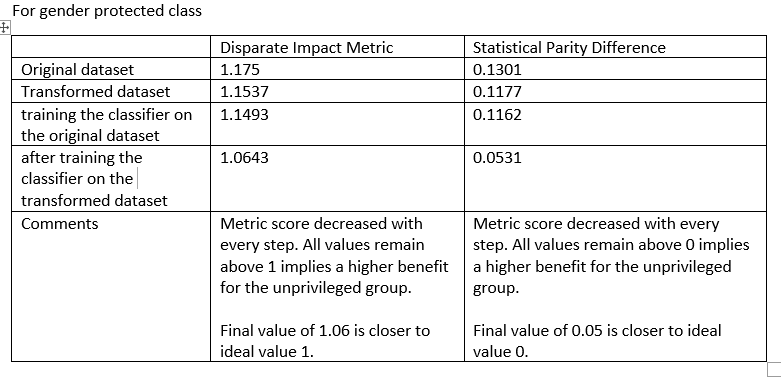

## step 5

### step 5.1
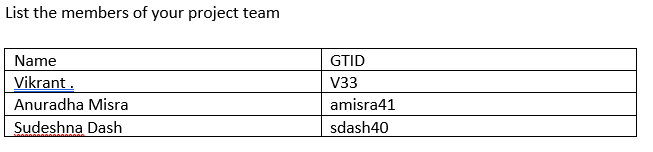

### step 5.2

#### plots for metrices calculated in for 3.2

#### For Race

Text(0.5, 1.0, 'For Race')

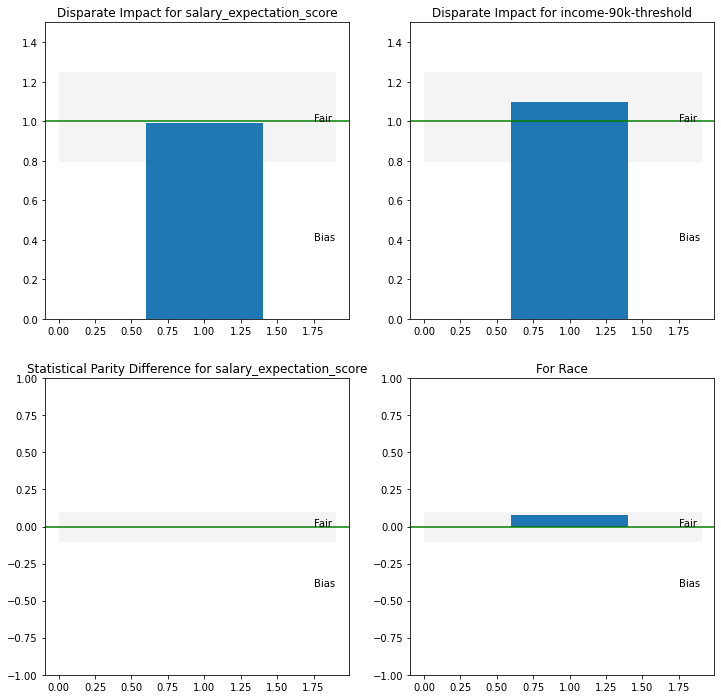

In [442]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.9923,1.099,-0.006,0.0796]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### For Gender

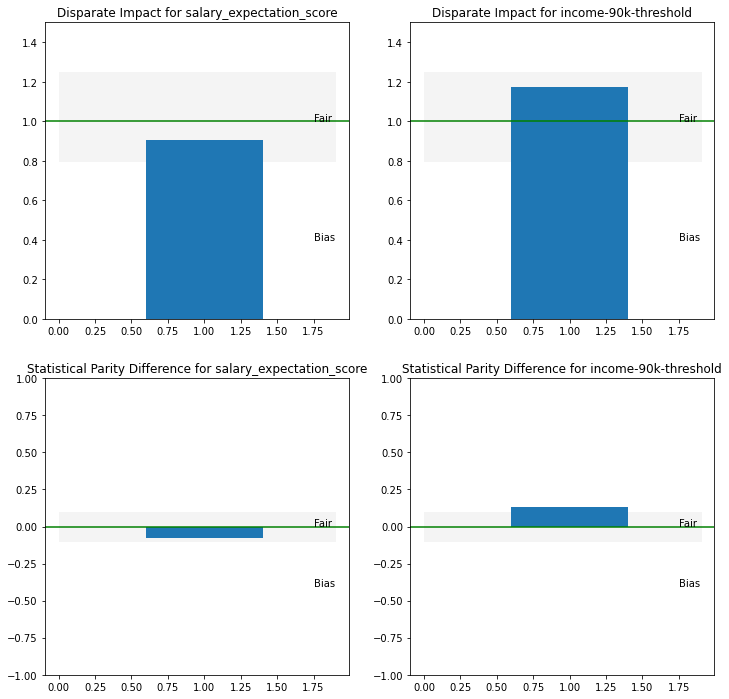

In [443]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.9035,1.175,-0.079,0.1301]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### For Age

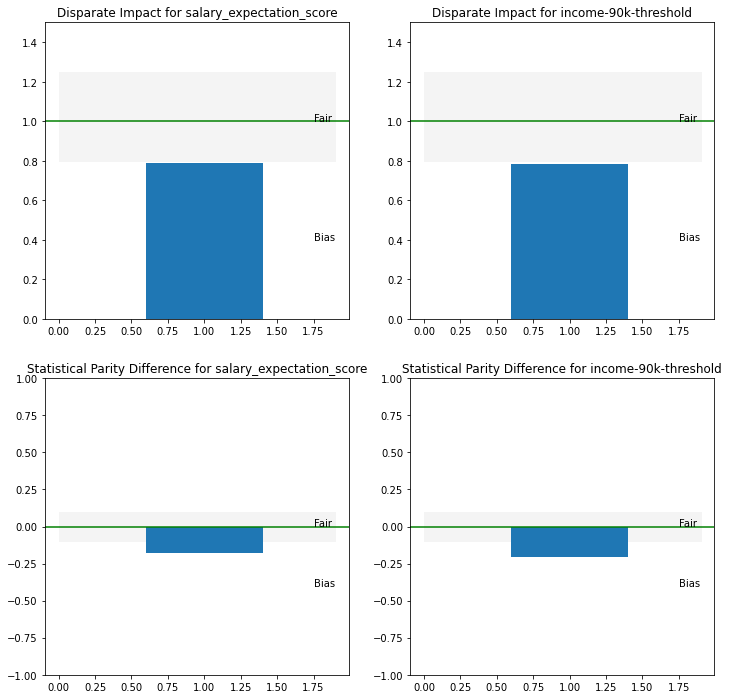

In [444]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.7893,0.7832,-0.1781,-0.2049]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### For Native County

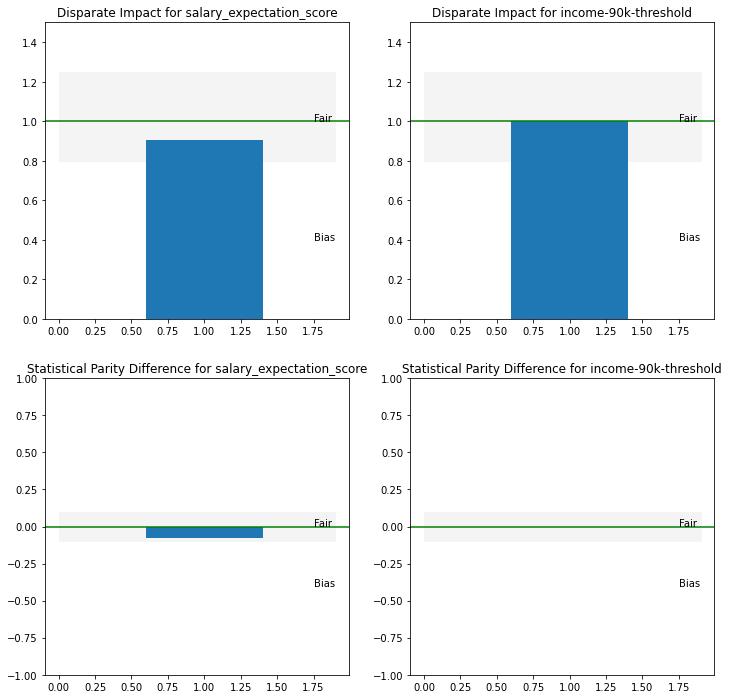

In [445]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.9037,1,-0.0765,0]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### plots for metrices calculated in for 3.4

#### For Race

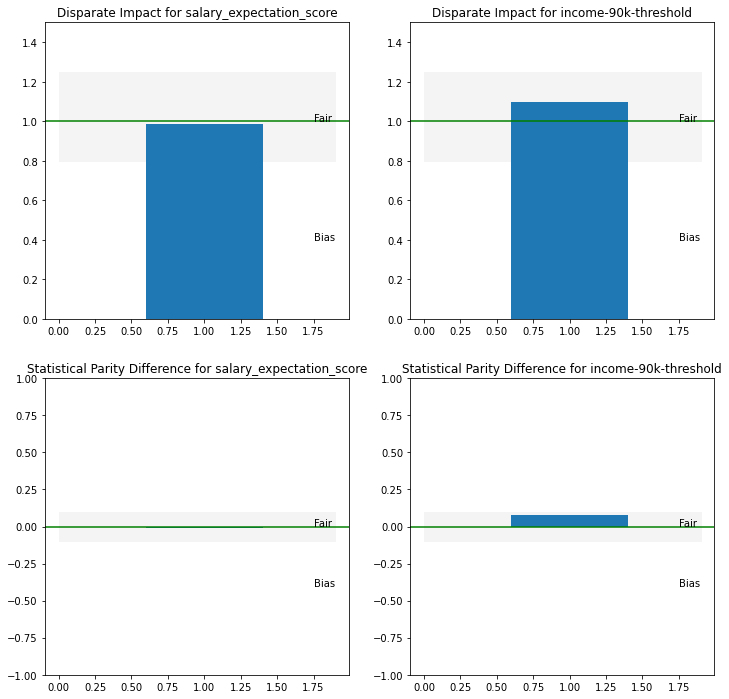

In [446]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.9872,1.0954,-0.0091,0.0776]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### For Gender

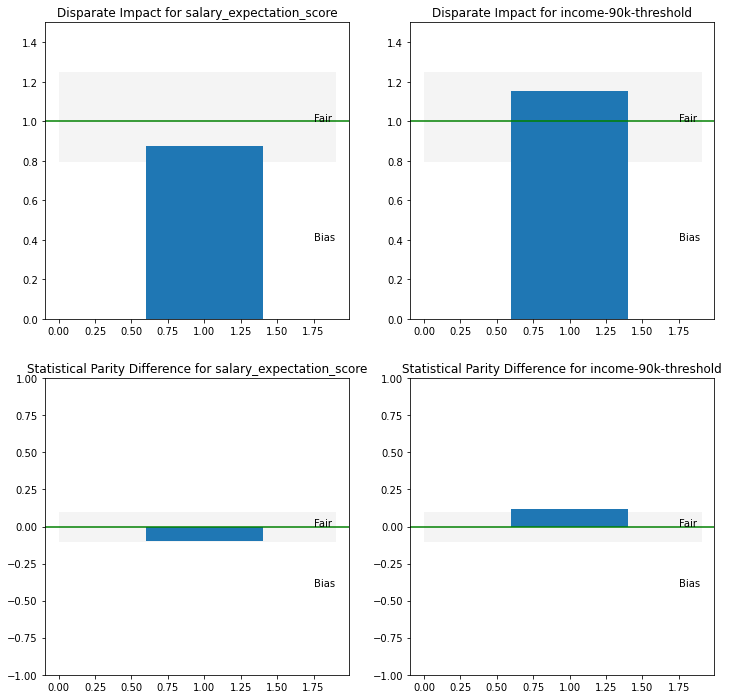

In [447]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.8761,1.1537,-0.0948,0.1177]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### For Age

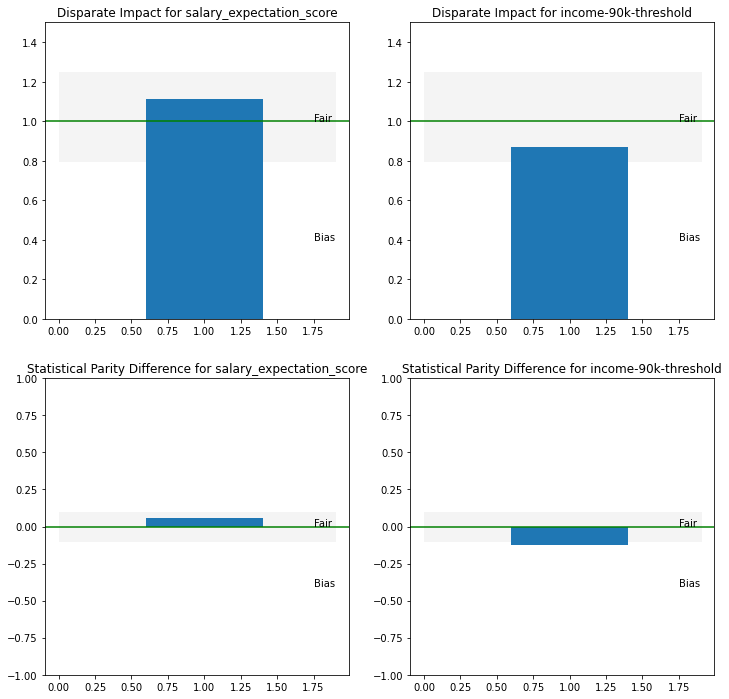

In [448]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [1.1130,0.8679,0.0593,-0.1252]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### For Native County

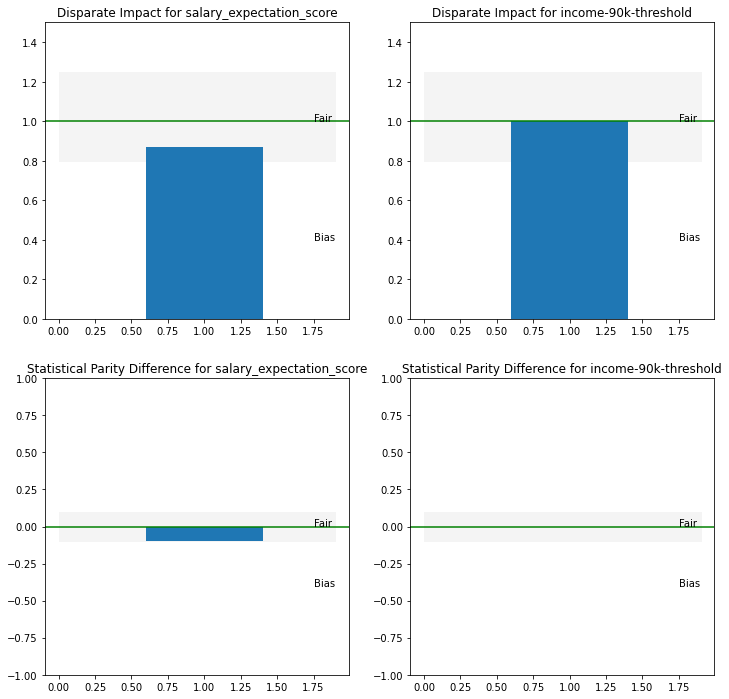

In [449]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.8708,1,-0.0951,0]
labels = ['salary_expectation_score','income-90k-threshold','salary_expectation_score','income-90k-threshold']
types = ['Disparate Impact','Statistical Parity Difference']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        if count < 2:
            type = types[0]
            axs[x1,y1].annotate("Fair", (1.75, 1))
            axs[x1,y1].annotate("Bias", (1.75, .4))
            axs[x1,y1].axhline(y = 1, color = 'g')
            axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
            axs[x1,y1].set_ylim((0, 1.5))
        else:
            axs[x1,y1].annotate("Fair", (1.75, 0))
            axs[x1,y1].annotate("Bias", (1.75, -0.4))
            axs[x1,y1].axhline(y = 0, color = 'g')
            axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
            type = types[1]
            axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### plots for metrices calculated in for 4.5

#### Disparate Impact for Gender

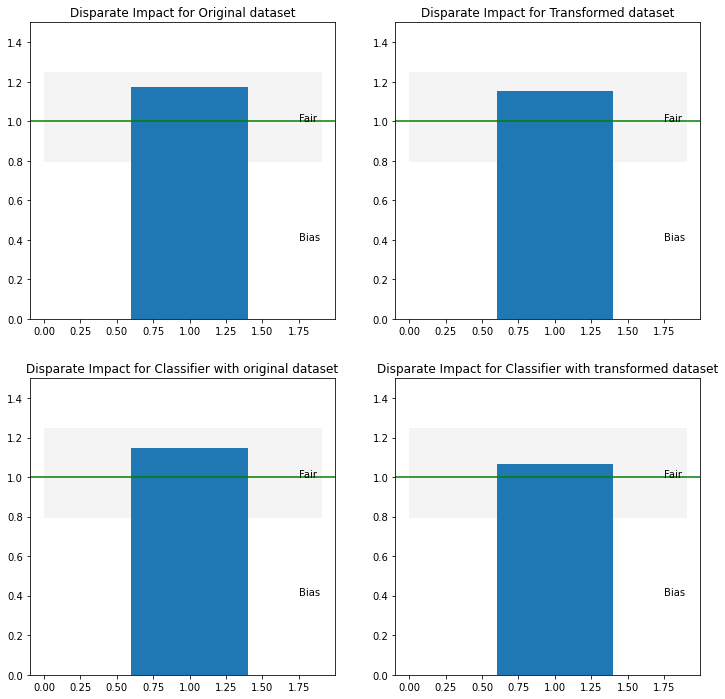

In [460]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [1.175,1.1537,1.1493,1.0643]
labels = ['Original dataset','Transformed dataset','Classifier with original dataset','Classifier with transformed dataset']
types = ['Disparate Impact']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        type = 'Disparate Impact'
        axs[x1,y1].annotate("Fair", (1.75, 1))
        axs[x1,y1].annotate("Bias", (1.75, .4))
        axs[x1,y1].axhline(y = 1, color = 'g')
        axs[x1,y1].fill_between(x, 0.8, 1.25, color = '#F4F4F4')
        axs[x1,y1].set_ylim((0, 1.5))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

#### Statistical Parity Difference for Gender

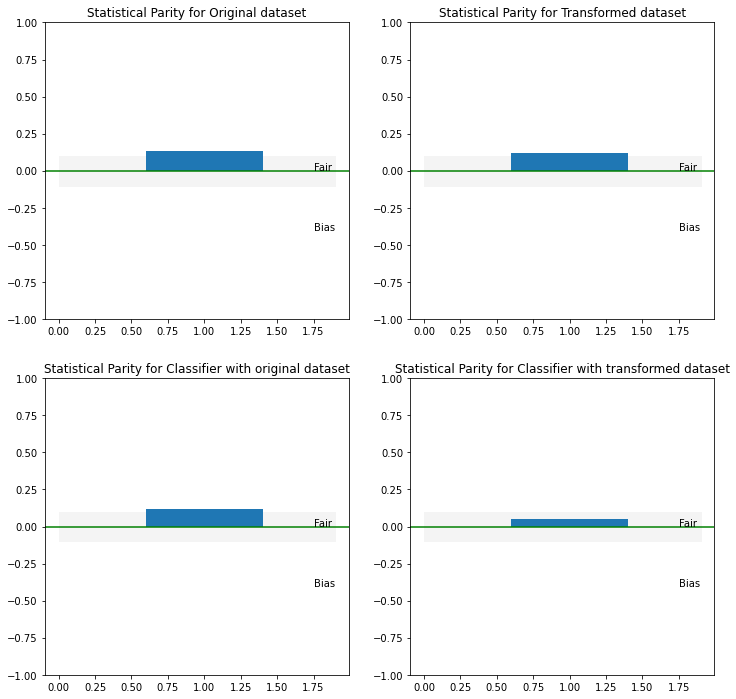

In [462]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
disparate_impact_metrics = [0.1301,0.1177,0.1162,0.0531]
labels = ['Original dataset','Transformed dataset','Classifier with original dataset','Classifier with transformed dataset']
types = ['Disparate Impact']

count = 0
for x1 in range(2):
    for y1 in range(2):        
        x =  np.arange(0.0, 2, 0.1)
        
        type = 'Statistical Parity'
        axs[x1,y1].annotate("Fair", (1.75, 0))
        axs[x1,y1].annotate("Bias", (1.75, -0.4))
        axs[x1,y1].axhline(y = 0, color = 'g')
        axs[x1,y1].fill_between(x, -0.1, 0.1, color = '#F4F4F4')
        axs[x1,y1].set_ylim((-1, 1))
            
        axs[x1,y1].bar(1,disparate_impact_metrics[count])
        axs[x1,y1].set_title('{} for {}'.format(type, labels[count]))
        count += 1

### step 5.3
Q) Explain which fairness metric (if any) is best and provide a justification for your answer  
A) Fairness metrics are used to compute the fairness of the algorithm with respect to a protected attribute. The metrics provide us insights as to whether the AI algorithm is biased/unbiased towards the privileged or unprivileged groups and help us decide if the bias observed is within the acceptable range or further steps are needed to mitigate the bias to ensure fairness. The correlations observed for a protected class with respect to the outcome variable give us an indication relating to the fairness of the algorithm. In our project we used Disparate Impact and Statistical Parity to ensure that the model make equal predictions for all the protected groups in the class. Both these measures might have a slight disadvantage in terms of favorable outcomes, as the proportion of the favorable outcomes might be different for different groups might be different. Perhaps, a better fairness metric would be Equal Opportunity which requires that the model predicts outcomes which are equal across the protected groups but is dependent on the favorable outcome being observed. But for this assignment, we did not venture into this fairness metric because it was difficult to compute.

### step 5.4
Q Did any of these approaches seems to work to mitigate bias (or increase fairness)? Explain your reasoning. Did any group receive a positive advantage? Was any group disadvantaged by these approaches? What issues would arise if you used these methods to mitigate bias?

Vikrant’s response

Yes, the followed approach did help mitigate bias and increase fairness to certain extent. The outcome of step 3.2 show that while in the original had higher benifit for one or the other class, most metric outcomes were within accetable limit of 0.8-1.25 for Disparate Impact and between -0.1 and 0.1 for Statistical Parity Difference. One exception to this was protected class variable Age which has -0.17 and -0.20 score for Statistical Parity Difference and approximately 0.78 score for Disparate Impact. Thus, in step 3.4 we designed reweighting approach to specifically deal with this issue. We specifically left out people whose 'salary_expectation_score' was more than 350. This was done for young people. Thus, after step 4 we notice that Statistical Parity Difference metric score for Age variable changed from -0.17 to 0.05 for salary_expectation_score dependent variable. For the second dependent variable, this value changed from -.20 to -.12. This is understandable since our step 3.3 was performed as a function of one dependent variable. Thus, data transformation using reweighing seems to work for and help mitigate bias. 
Similarly, step 4a was also helpful in further improving the fairness. Using the classifier technique we noticed that Disparate Impact Metric values further reduced from 1.175 to 1.064 on the transformed dataset. This value is close to ideal value 1.0, which shows absolute no bias. For Statistical Parity Difference, the final value was 0.053 which was also closer to ideal value 0.

In general the identified unprivileged group for age procteced class (16,29) was at disadvantage. After reweighing this group got positive advantage but only for one of the dependent variable. On contrary, privileged group (43,57] was at advantage. In general, we noticed that race protected class had metric values very close to ideal values and thus least bias. Overall, while reweighing did help reduce bias in Age protected class, in general it had some small impact on all other protected classes. E.g. For Gender and Native Country protected class, the metric score worsened after this step. This highlights issue with reweighing. Since it assigns different weights to samples, it can increase bias for protected class variables.

Anuradha’s response

Yes. For bias mitigation, we applied Reweighting which has significantly reduced the bias in the dataset. From our analysis in step 3.2 and 3.4, we see that the fairness metrics have improved and are closer to the ideal values after applying the bias mitigation algorithm. We have applied reweighting to ensure fairness for the Age Protected Class which was in a very disadvantaged position earlier(step 3.2). We notice bias towards the unprivileged group(Age (16,29)) using both the fairness metrics Disparate Impact and Statistical Parity. To mitigate the bias, we have assigned different weights to the data samples based on the outcome variable salary_expectation_score and the category of the protected attribute(Age). Thus, we see an improvement in the fairness metrics after bias mitigation and there is higher benefit for the unprivileged group. But after mitigation bias for the Age protected Class, there seems to be a slight reduction in fairness metrics for the Gender Unprivileged group(Female), and thus, this group might be slightly disadvantaged by our approaches. The problem with reweighting is that, since we assign different weights to the data samples based on groupings in one protected class to mitigate the bias for that class, it can increase the bias with respect to another protected class. Secondly, this pre-processing algorithm seems to work only for classification which can handle modification in row-level weight values, limiting the modeling options available for us. Thus, we chose to use a Decision Tree Classifier to train the dataset.

Sudeshna’s response

According to the fairness metrics used in our project, we saw that there was a clear bias toward the unprivileged group for protected class Age. The age group between 16 to 29 is the unprivileged group and the salary expectation score is so less. So, we selected Reweighting to mitigate the bias and increase fairness. Using this method, we saw positive results for the unprivileged group. Previously, the group between the ages of 44 to 57 was found to be more favorable.  But after reweighting, we saw that the bias got reduced and fairness metrics came closer to their individual ideal score. Hence, the unprivileged group (aged between 16 to 29) received a positive advantage. But we also saw that this method increased bias for Gender protected class as well as the Native country protected class. Reweighting tries to assign different weights based on one protected class, but it can impact the other protected classes in the same dataset. And here we saw that Gender, as well as Native country class, was a bit impacted due to the bias mitigation technique.  There was a disadvantage for the unprivileged groups (female and non-US citizens). Moreover, using these methods might reduce the compliance of the ground truth levels and it might be an issue as it won’t reflect clearly the importance of a particular group. It also targets the already fair labels and can be disadvantageous to a certain protected group.

### end of project